In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Для начала, возьмем данные только за Q1, они уже сохранены в переменную bikes_Q1. Перед тем как сделать .resample(), нужно немного подготовить данные. Поместите колонку start_time в качестве индексов и сохраните изменения в исходный датасет. Предварительно проверьте тип переменной, и приведите её к правильному, если необходимо.

In [2]:
bikes_Q1 = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_q1_sample.csv',\
                       parse_dates=['start_time', 'end_time'])

In [3]:
bikes_Q1.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                 object
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
dtype: object

In [4]:
bikes_Q1.set_index('start_time', inplace=True)

In [5]:
bikes_Q1

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-01-22 20:04:31,17617135,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
2018-03-16 19:47:59,17897619,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2018-03-14 18:49:20,17881307,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
2018-03-14 18:33:48,17881130,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
2018-02-05 17:39:14,17686289,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28 17:16:53,17792363,2018-02-28 17:18:49,2401,116.0,50,Clark St & Congress Pkwy,41,Federal St & Polk St,Subscriber,Male,1991.0
2018-02-08 11:52:44,17695807,2018-02-08 11:58:13,4687,329.0,18,Wacker Dr & Washington St,39,Wabash Ave & Adams St,Subscriber,Male,1979.0
2018-03-22 17:18:21,17938644,2018-03-22 17:24:13,6200,352.0,59,Wabash Ave & Roosevelt Rd,50,Clark St & Congress Pkwy,Subscriber,Male,1968.0


В данных имеется как дата аренды, так и её точное время начала и окончания с точностью до секунд. Применим метод pd.resample() и агрегируем данные по дням.

In [6]:
bikes_Q1.resample(rule='D').count().sort_values('trip_id', ascending=False)

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-02-27,4196,4196,4196,4196,4196,4196,4196,4196,4196,3940,3943
2018-03-28,3640,3640,3640,3640,3640,3640,3640,3640,3640,3265,3268
2018-02-26,3422,3422,3422,3422,3422,3422,3422,3422,3422,3290,3290
2018-02-28,3412,3412,3412,3412,3412,3412,3412,3412,3412,3307,3307
2018-03-15,3245,3245,3245,3245,3245,3245,3245,3245,3245,3054,3054
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-10,364,364,364,364,364,364,364,364,364,353,353
2018-02-11,331,331,331,331,331,331,331,331,331,319,320
2018-02-09,300,300,300,300,300,300,300,300,300,291,291


Посмотрим на распределение количества аренд для разных групп пользователей (usertype) — customers и subscribers в данных за апрель.

In [7]:
bikes_april = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_april.csv',\
                       parse_dates=['start_time', 'end_time'])

In [8]:
bikes_april.groupby(['usertype', 'start_time']) \
        .agg({'trip_id': 'count'}) \
        .unstack(level=0) \
        .resample(rule='D').sum()

trip_id           
usertype   Customer Subscriber
start_time                    
2018-04-01    239.0      825.0
2018-04-02    166.0     2841.0
2018-04-03     31.0     1873.0
2018-04-04     82.0     2253.0
2018-04-05     90.0     2502.0
2018-04-06    124.0     2520.0
2018-04-07    335.0     1416.0
2018-04-08    242.0     1252.0
2018-04-09     39.0     1798.0
2018-04-10    117.0     3114.0
2018-04-11    305.0     3815.0
2018-04-12    491.0     4155.0
2018-04-13    208.0     2811.0
2018-04-14     41.0      611.0
2018-04-15     41.0      528.0
2018-04-16     40.0     1960.0
2018-04-17    121.0     3090.0
2018-04-18     45.0     2196.0
2018-04-19    164.0     3296.0
2018-04-20    562.0     3747.0
2018-04-21    655.0     1845.0
2018-04-22   1055.0     2241.0
2018-04-23    345.0     3930.0
2018-04-24    367.0     4356.0
2018-04-25    220.0     3959.0
2018-04-26    544.0     4398.0
2018-04-27    416.0     3424.0
2018-04-28    713.0     2015.0
2018-04-29   1082.0     2114.0
2018-04-30   1098.0     5281.0

Посмотрим на данные за период с апреля по декабрь.

In [9]:
bikes_q2_sample_apr = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_q2_sample_apr.csv')
bikes_q2_sample_may = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_q2_sample_may.csv')
bikes_q2_sample_jun = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_q2_sample_jun.csv')
bikes_q3_sample_july = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_q3_sample_july.csv')
bikes_q3_sample_aug = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_q3_sample_aug.csv')
bikes_q3_sample_sep = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_q3_sample_sep.csv')
bikes_q4_sample_oct = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_q4_sample_oct.csv')
bikes_q4_sample_nov = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_q4_sample_nov.csv')
bikes_q4_sample_dec = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_python/all_data/bikes_q4_sample_dec.csv')

In [10]:
bikes = pd.concat([bikes_q2_sample_apr, bikes_q2_sample_may, bikes_q2_sample_jun, bikes_q3_sample_july,\
                   bikes_q3_sample_aug, bikes_q3_sample_sep, bikes_q4_sample_oct, bikes_q4_sample_nov,\
                   bikes_q4_sample_dec])

In [11]:
bikes['start_time'] = pd.to_datetime(bikes['start_time'])

In [12]:
bikes_by_usertype = bikes.groupby(['usertype', 'start_time']).agg({'trip_id': 'count'}) \
        .rename(columns={'trip_id': 'count'}) \
        .unstack(level=0) \
        .resample(rule='D').sum()

In [13]:
bikes_by_usertype

count           
usertype   Customer Subscriber
start_time                    
2018-04-01    166.0      549.0
2018-04-02    110.0     1865.0
2018-04-03     19.0     1276.0
2018-04-04     53.0     1501.0
2018-04-05     62.0     1637.0
...             ...        ...
2018-12-27     28.0      684.0
2018-12-28     65.0      872.0
2018-12-29     23.0      350.0
2018-12-30     55.0      385.0
2018-12-31     27.0      352.0

[275 rows x 2 columns]

In [14]:
bikes_by_usertype = bikes_by_usertype.T.reset_index(drop=True).T #reset_index для колонок

In [15]:
bikes_by_usertype.rename(columns={0: 'Customer', 1: 'Subscriber'}, inplace=True)

Сделаем преобразование по дням для каждой группы пользователей (usertype), затем выберем дни, в которые число аренд, сделанных customers, было больше, чем у subscribers.

In [16]:
bikes_by_usertype.query('Customer > Subscriber')

,Customer,Subscriber
start_time,,
2018-05-27,3263.0,2449.0
2018-09-02,2752.0,2183.0


In [17]:
# bikes.set_index('start_time', inplace=True)
# bikes.groupby('usertype').resample(rule='D').size().T

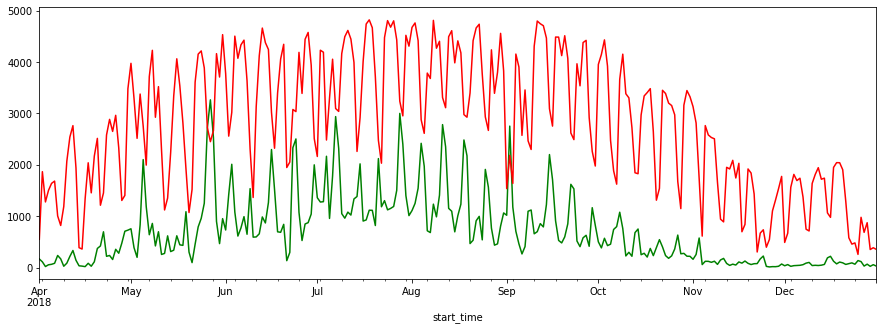

In [18]:
# визуализация
plt.figure(figsize=(15, 5))
bikes_by_usertype.iloc[:, 0].plot(color='Green') # customer
bikes_by_usertype.iloc[:, 1].plot(color='Red') # subscriber
plt.show()

Отлично! Следующий шаг – более подробно посмотреть на летний период.

Еще один плюс использования дат в качестве индексов – возможность выбрать данные за интересующий нас промежуток времени. В переменную bikes_summer сохраним наблюдения с 1 июня по 31 августа. Затем запишем в top_destination наиболее популярный пункт назначения (его название). Агрегируем данные по дням и определим, в какой день в полученный пункт (top_destination) было совершено меньше всего поездок. Дату сохраним в bad_day, отформатировав timestamp с помощью .strftime('%Y-%m-%d').bikes

In [19]:
bikes = bikes.set_index('start_time')
bikes_summer = bikes.loc['2018-06-01': '2018-08-31']

In [20]:
bikes_summer

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-06-01 00:04:40,18709077,2018-06-01 00:06:47,3155,127.0,128,Damen Ave & Chicago Ave,214,Damen Ave & Grand Ave,Subscriber,Female,1978.0
2018-06-01 00:06:08,18709080,2018-06-01 00:24:18,2807,"1,090.0",258,Logan Blvd & Elston Ave,69,Damen Ave & Pierce Ave,Customer,NaN,NaN
2018-06-01 00:08:01,18709086,2018-06-01 00:32:55,2737,"1,494.0",337,Clark St & Chicago Ave,225,Halsted St & Dickens Ave,Customer,Male,1988.0
2018-06-01 00:09:02,18709091,2018-06-01 00:19:21,6089,619.0,210,Ashland Ave & Division St,56,Desplaines St & Kinzie St,Subscriber,Male,1987.0
2018-06-01 00:09:28,18709092,2018-06-01 00:14:44,2352,316.0,240,Sheridan Rd & Irving Park Rd,303,Broadway & Cornelia Ave,Subscriber,Male,1997.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:49:34,20479557,2018-08-31 23:56:20,4289,406.0,374,Western Ave & Walton St,69,Damen Ave & Pierce Ave,Subscriber,Male,1987.0
2018-08-31 23:49:56,20479559,2018-09-01 00:30:37,6337,"2,441.0",497,Kimball Ave & Belmont Ave,599,Valli Produce - Evanston Plaza,Subscriber,Male,1989.0
2018-08-31 23:50:01,20479560,2018-08-31 23:58:00,1429,479.0,113,Bissell St & Armitage Ave,16,Paulina Ave & North Ave,Subscriber,Male,1987.0


In [21]:
top_destination = bikes_summer.groupby('to_station_name').count().idxmax()[0]
# top_destination = bikes_summer.to_station_name.describe().top

In [22]:
bad_day = bikes_summer.query('to_station_name == @top_destination')\
        .resample(rule='D').count()\
        .idxmin()[0].strftime('%Y-%m-%d')

In [23]:
bad_day

'2018-06-21'

Куда больше всего ездят на выходных? Туда же, куда и в будние дни, или в другие пункты назначения?

In [24]:
bikes_summer = bikes_summer.assign(weekday = lambda x: pd.to_datetime(x.index).strftime('%A'))

In [25]:
bikes_summer.query('weekday == "Saturday"').groupby('to_station_name').size().sort_values(ascending=False)

to_station_name
Streeter Dr & Grand Ave       3461
Lake Shore Dr & North Blvd    1690
Theater on the Lake           1470
Lake Shore Dr & Monroe St     1232
Millennium Park               1080
                              ... 
Seeley Ave & Garfield Blvd       1
Shields Ave & 43rd St            1
Stony Island Ave & 82nd St       1
Stony Island Ave & 75th St       1
Halsted St & 59th St             1
Length: 557, dtype: int64

In [26]:
bikes_summer.query('weekday != "Saturday" and weekday != "Sunday"').groupby('to_station_name').size().idxmax()

'Streeter Dr & Grand Ave'

In [27]:
(bikes_summer
 .groupby(['weekday', 'to_station_name'])
 .size()
.sort_values(ascending=False)
)

weekday    to_station_name            
Saturday   Streeter Dr & Grand Ave        3461
Sunday     Streeter Dr & Grand Ave        2565
Friday     Streeter Dr & Grand Ave        1726
Saturday   Lake Shore Dr & North Blvd     1690
Wednesday  Streeter Dr & Grand Ave        1669
                                          ... 
Sunday     Pulaski Rd & Lake St              1
Monday     Racine Ave & 65th St              1
Saturday   Halsted St & 59th St              1
Friday     South Chicago Ave & 83rd St       1
Monday     Austin Blvd & Madison St          1
Length: 3893, dtype: int64